Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

Загрузка данных

In [3]:
try:
    df_train = pd.read_excel('train_new.xlsx')
    df_test = pd.read_excel('test_new.xlsx')
except FileNotFoundError:
    print("Один из файлов (train_new.xlsx или test_new.xlsx) не найден.")
    exit()
except Exception as e:
    print(f"Произошла ошибка при загрузке данных: {e}")
    exit()


Подготовка данных

In [4]:
# Преобразуем столбец dt в числовой формат (количество дней с начала отсчета)
# Линейная регрессия лучше работает с числовыми данными, чем с датами
df_train['dt_numeric'] = (df_train['dt'] - df_train['dt'].min()).dt.days
df_test['dt_numeric'] = (df_test['dt'] - df_test['dt'].min()).dt.days

# Выбираем признаки и целевую переменную
X_train = df_train[['dt_numeric']]  # Признак - числовое представление даты
y_train = df_train['Цена на арматуру']  # Целевая переменная - цена на арматуру
X_test = df_test[['dt_numeric']]
y_test = df_test['Цена на арматуру']

In [5]:
# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель на тренировочных данных
model.fit(X_train, y_train)



LinearRegression()

In [6]:
# Делаем предсказания на тестовых данных
y_pred = model.predict(X_test)

In [7]:
# Рассчитываем метрики оценки
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 6598.61
RMSE: 8647.65


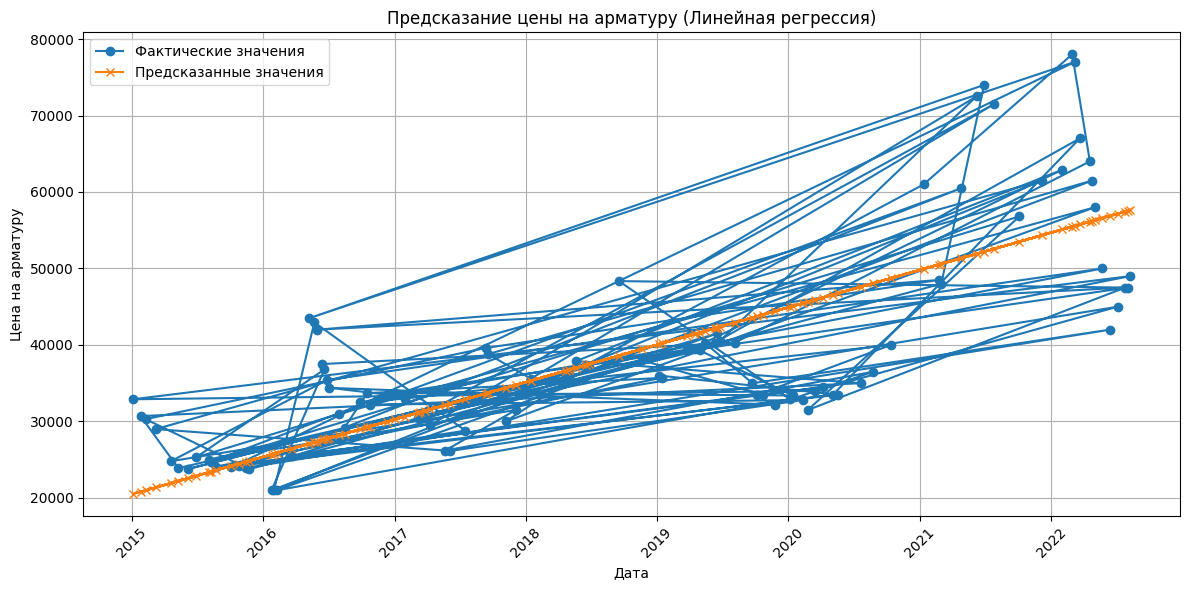

In [8]:
# Строим график фактических и предсказанных значений
plt.figure(figsize=(12, 6))
plt.plot(df_test['dt'], y_test, marker='o', label='Фактические значения')
plt.plot(df_test['dt'], y_pred, marker='x', label='Предсказанные значения')
plt.xlabel('Дата')
plt.ylabel('Цена на арматуру')
plt.title('Предсказание цены на арматуру (Линейная регрессия)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Импорт библиотек

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge  # L2 регуляризация
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

Загрузка данных

In [10]:
try:
    df = pd.read_excel('train_new.xlsx', index_col='dt', parse_dates=['dt'])
    print("Файл успешно загружен.")
except FileNotFoundError:
    print("Файл train_new.xlsx не найден.")
    exit()
except Exception as e:
    print(f"Произошла ошибка при загрузке файла: {e}")
    exit()

Файл успешно загружен.


Сортировка по дате 


In [11]:
# Убедимся, что данные отсортированы по дате
df = df.sort_index()
print("Данные отсортированы по дате.")

Данные отсортированы по дате.


Создание новых признаков

In [14]:


# Feature Engineering (Создание новых признаков)
for i in range(1, 4):
    df[f'Цена_лаг_{i}'] = df['Цена на арматуру'].shift(i)

df['Цена_скользящая_3'] = df['Цена на арматуру'].rolling(window=3).mean()

df['Разность_цен'] = df['Цена на арматуру'].diff()

# Создаем временные признаки (ИСПОЛЬЗУЕМ ИНДЕКС, А НЕ СТОЛБЕЦ)
df['Месяц'] = df.index.month

print("Новые признаки созданы.")


Новые признаки созданы.


Обработка пропущенных значений

In [15]:
# Удаляем строки с пропущенными значениями
df = df.dropna()
print("Пропущенные значения обработаны (строки с NaN удалены).")

Пропущенные значения обработаны (строки с NaN удалены).


Разделение на признаки и целевую переменную, и на тренировочную и тестовую выборки

In [16]:
# Разделяем на признаки (X) и целевую переменную (y)
X = df.drop('Цена на арматуру', axis=1)
y = df['Цена на арматуру']

# Разделяем на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42) #shuffle = False чтобы не перемешивать временной ряд
print("Данные разделены на тренировочную и тестовую выборки.")

Данные разделены на тренировочную и тестовую выборки.


Масштабирование признаков (StandardScaler)

In [17]:
# Масштабируем признаки
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Признаки масштабированы.")



Признаки масштабированы.


Обучение модели (Ridge Regression с L2 регуляризацией)

In [18]:
# Создаем и обучаем модель Ridge Regression
model = Ridge(alpha=1.0)  #  alpha - параметр регуляризации
model.fit(X_train, y_train)
print("Модель обучена.")

Модель обучена.


Предсказание на тестовых данных

In [19]:
# Предсказываем на тестовых данных
y_pred = model.predict(X_test)
print("Предсказания сделаны.")



Предсказания сделаны.


 Оценка модели

In [20]:
# Оцениваем результаты
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")



MAE: 174.66
RMSE: 251.12


 Визуализация результатов

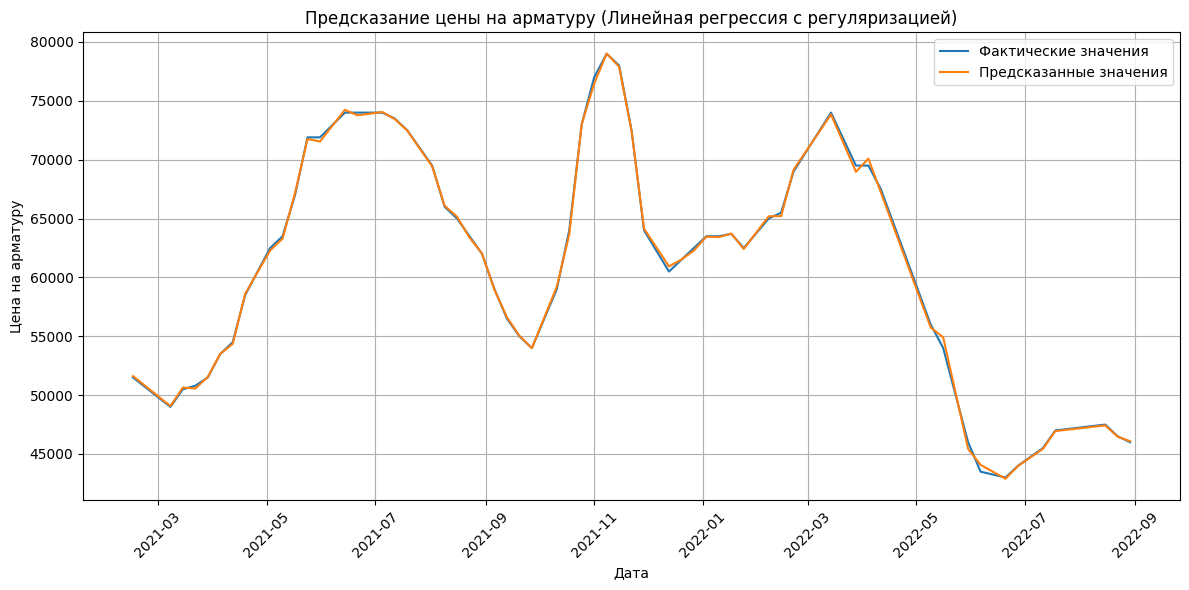

In [21]:
# Визуализируем результаты
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Фактические значения')
plt.plot(y_test.index, y_pred, label='Предсказанные значения')
plt.xlabel('Дата')
plt.ylabel('Цена на арматуру')
plt.title('Предсказание цены на арматуру (Линейная регрессия с регуляризацией)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
import numpy
print(numpy.__version__)

2.2.4


In [25]:
import numpy
print(numpy.__file__)

d:\python\Lib\site-packages\numpy\__init__.py


In [32]:
import pandas as pd
import numpy as np
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
try:
    # Явно указываем, что 'dt' - это индекс, парсим даты
    df = pd.read_excel('train_new.xlsx', index_col='dt', parse_dates=['dt'])
    print("Файл успешно загружен.")
except FileNotFoundError:
    print("Файл train_new.xlsx не найден.")
    exit()
except Exception as e:
    print(f"Произошла ошибка при загрузке файла: {e}")
    exit()

# Убедимся, что данные отсортированы по индексу (дате)
df = df.sort_index()
print("Данные отсортированы по дате.")

# Выводим первые несколько строк, чтобы убедиться, что индекс установлен правильно
print(df.head())

# Разделяем на тренировочную и тестовую выборки (без перемешивания)
train_data, test_data = model_selection.train_test_split(df['Цена на арматуру'], test_size=0.2, shuffle=False)

print("Данные разделены на тренировочную и тестовую выборки.")

In [ ]:
from pmdarima.arima import ndiffs

# Определяем количество дифференцирований для достижения стационарности
kpss_diffs = ndiffs(train_data, alpha=0.05, test='kpss', max_d=3)
adf_diffs = ndiffs(train_data, alpha=0.05, test='adf', max_d=3)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Необходимо дифференцировать ряд {n_diffs} раз")

In [ ]:
# Автоматически подбираем параметры ARIMA
try:
    model = pm.auto_arima(train_data,
                          d=n_diffs,  # Используем определенное количество дифференцирований
                          seasonal=False,  # Отключаем сезонность для упрощения
                          trace=True,  # Выводим информацию о процессе подбора
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)  # Используем stepwise-алгоритм для ускорения поиска

    print("Модель ARIMA обучена.")
    print(model.summary())  # Выводим информацию о подобранной модели
except Exception as e:
    print(f"Произошла ошибка во время обучения модели ARIMA: {e}")
    exit()

In [ ]:
try:
    # Предсказываем на тестовых данных
    predictions, conf_int = model.predict(n_periods=len(test_data), return_conf_int=True)
    print("Предсказания сделаны.")
except Exception as e:
    print(f"Произошла ошибка во время предсказания: {e}")
    exit()

In [ ]:
try:
    # Оцениваем точность
    mae = mean_absolute_error(test_data, predictions)
    rmse = np.sqrt(mean_squared_error(test_data, predictions))

    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
except Exception as e:
    print(f"Произошла ошибка во время оценки модели: {e}")
    exit()



In [ ]:
try:
    # Визуализируем результаты
    plt.figure(figsize=(12, 6))
    plt.plot(train_data, label='Train')
    plt.plot(test_data, label='Test')
    plt.plot(test_data.index, predictions, color='red', label='Predictions')
    plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='k', alpha=.15)
    plt.xlabel('Дата') # Добавил подписи к осям и заголовок
    plt.ylabel("Цена на арматуру")
    plt.title("Предсказание цен на арматуру с помощью ARIMA")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("График построен.")
except Exception as e:
    print(f"Произошла ошибка во время визуализации: {e}")
    exit()